# Global ECMWF Fire Forecasting

The European Centre for Medium-range Weather Forecasts ([ECMWF](https://www.ecmwf.int/)) produces daily fire danger forecasts and reanalysis products for the Copernicus Emergency Management Services ([CEMS](https://emergency.copernicus.eu/)). Activities are funded funded through a third-party agreement with the European Commission’s Joint Research Centre (JRC).

The modelling system that generates the fire data products is called Global ECMWF Fire Forecast ([GEFF](\href{https://git.ecmwf.int//projects/CEMSF/repos/geff/browse)) and it is based on the Canadian Fire Weather index as well as the US and Australian fire danger systems.

## Data overview

Fire danger data products:

- **geff-rt** provides the following *real-time* fire danger forecasts using weather forcings from the latest model cycle of the ECMWF’s Integrated Forecasting System (IFS):
    - high-resolution deterministic (~9 Km, with 10 days lead time) and 
    - lower-resolution probabilistic (~18Km, with 15 days lead time)
- **geff-re** provides historical records of global fire danger conditions (*reanalysis*) from 1980 to the present day. This dataset is updated as soon as new ERA-5 data becomes available (~2 months behind real-time) and it is made of four products:
    - deterministic model outputs (~28 Km),
    - probabilistic model outputs (made of 10 ensemble members, ~56 Km),
    - ensemble mean and
    - ensemble spread.
    
All of GEFF data products are under the Copernicus license, which provides users with free, full and open access to environmental data.

## Data availability

- **geff-rt** data can be requested through an online [form](https://effis.jrc.ec.europa.eu/applications/data-request-form/) and viewed using the following platforms: the European Forest Fire Information System ([EFFIS](https://effis.jrc.ec.europa.eu/static/effis_current_situation/public/index.html)) and the Global Wildfire Information System ([GWIS](https://gwis.jrc.ec.europa.eu/static/gwis_current_situation/public/index.html))
- **geff-re** is available through the Copernicus Climate Data Store ([CDS](https://cds.climate.copernicus.eu)).

For educational purposes only, sample datasets are available on the [Zenodo wildfire community](https://zenodo.org/communities/wildfire). We will use these sample data hereafter.

### Get the sample data

These samples provide a sneak peak into GEFF fire danger data. However, they should be used for educational purposes only!

Instructions:

1. Go to the Zenodo data repository: https://zenodo.org/

2. Click on 'Communities', then type 'Wildfire', then click on 'View'. The page should list several datasets.

3. Click on 'Global ECMWF Fire Forecasting system - sample data for wildfires in Attica (Greece) on 23-26 July 2018' (https://doi.org/10.5281/zenodo.3784753)

    a. Scroll down and click on the 'Download' button next to the following tar files (it may take a while):
    
        - ECMWF_EFFIS_20180723_1200_en.tar
        - ECMWF_EFFIS_20180723_1200_hr.tar
        - ECMWF_EFFIS_20180723-26_1200_hr_e5.tar
        - ECMWF_EFFIS_20180723-26_1200_en_e5.tar
    
    b. Extract the tar files in your working directory.

## Explore the data

Import the necessary libraries and enable inline displaying of plots

In [16]:
# Standard imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline

### geff-rt: forecasts of the Fire Weather Index

These datasets use weather forcings from the ECMWF’s Integrated Forecasting System (IFS). Based on the date of this particular event (23-26 July 2018) we can find out what IFS model cycle was used, in this case it was 45r1.

![caption](images/IFS_model_cycles.png)

#### HRES forecast

This dataset provides real-time high-resolution deterministic (~9 Km) fire danger forecasts up to 10 days ahead. Let us explore the content of the sample file.

In [3]:
# Open the dataset
ds_rt_hr = xr.open_dataset("./data/greece/global/ECMWF_EFFIS_20180723_1200_hr/ECMWF_FWI_20180723_1200_hr.nc")
ds_rt_hr

<xarray.Dataset>
Dimensions:      (lat: 2560, lon: 5120, time: 10)
Coordinates:
  * lon          (lon) float32 0.0 0.0703125 0.140625 0.210938 0.28125 ...
  * lat          (lat) float32 89.9462 89.8765 89.8064 89.7361 89.6659 ...
  * time         (time) datetime64[ns] 2018-07-23 2018-07-24 2018-07-25 ...
Data variables:
    fwi          (time, lat, lon) float32 ...
    ffmc         (time, lat, lon) float32 ...
    dmc          (time, lat, lon) float32 ...
    dc           (time, lat, lon) float32 ...
    isi          (time, lat, lon) float32 ...
    bui          (time, lat, lon) float32 ...
    dsr          (time, lat, lon) float32 ...
    danger_risk  (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.8.2 (http://mpimet.mp...
    Conventions:       CF-1.6
    Reference date:    20180723
    ECMWF fire model:  2.2
    Lincense:          Copernicus
    version:           2.2
    CDO:               Climate Data Operators version 1.8.2 (http:/

This dataset has three dimensions: latitude, longitude and time. In the lat/long plane data are distributed on a regular grid (2560 x 5120), while the time dimension is made of 10 levels (each corresponds to a daily forecast estimate). Each cell of this datacube contains only 8 variables: fwi, ffmc, dmc, dc, isi, bui, dsr, danger_risk. 

To plot and run basic operations, it is convenient to convert the dataset to a dataarray by extracting 1 variable, e.g. fwi. 

Remember: 
- DataArray = single multi-dimensional variable and its coordinates
- Dataset = holds multiple variables that potentially share the same coordinates.

In [4]:
# Convert ds to a dataarray extracting only the variable fwi
da_rt_hr = ds_rt_hr.fwi
da_rt_hr

<xarray.DataArray 'fwi' (time: 10, lat: 2560, lon: 5120)>
[131072000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.0 0.0703125 0.140625 0.210938 0.28125 0.351562 ...
  * lat      (lat) float32 89.9462 89.8765 89.8064 89.7361 89.6659 89.5956 ...
  * time     (time) datetime64[ns] 2018-07-23 2018-07-24 2018-07-25 ...
Attributes:
    units:    -
    title:    Fire Weather Index

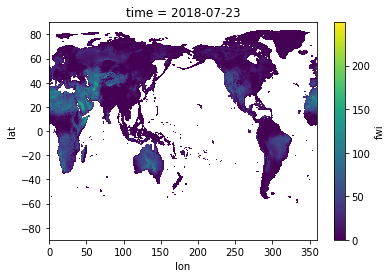

In [5]:
# Plot the first day
da_rt_hr[0].plot();

#### ENS forecast

This dataset provides real-time probabilistic (~18 Km) fire danger forecasts up to 10 days ahead. Each member of the ensemble has similar structure to the HRES but lower resolution.

In [6]:
# Open the dataset
ds_rt_en = xr.open_dataset("./data/greece/global/ECMWF_EFFIS_20180723_1200_en/ECMWF_FWI_20180723_1200_00.nc")
ds_rt_en

<xarray.Dataset>
Dimensions:      (lat: 1280, lon: 2560, time: 10)
Coordinates:
  * lon          (lon) float32 0.0 0.140625 0.28125 0.421875 0.5625 0.703125 ...
  * lat          (lat) float32 89.8924 89.753 89.6128 89.4724 89.3319 ...
  * time         (time) datetime64[ns] 2018-07-23 2018-07-24 2018-07-25 ...
Data variables:
    fwi          (time, lat, lon) float32 ...
    ffmc         (time, lat, lon) float32 ...
    dmc          (time, lat, lon) float32 ...
    dc           (time, lat, lon) float32 ...
    isi          (time, lat, lon) float32 ...
    bui          (time, lat, lon) float32 ...
    dsr          (time, lat, lon) float32 ...
    danger_risk  (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.8.2 (http://mpimet.mp...
    Conventions:       CF-1.6
    Reference date:    20180723
    ECMWF fire model:  2.2
    Lincense:          Copernicus
    version:           2.2
    CDO:               Climate Data Operators version 1.8.2 (h

In [7]:
# Convert ds to a dataarray extracting only the variable fwi
da_rt_en = ds_rt_en.fwi
da_rt_en

<xarray.DataArray 'fwi' (time: 10, lat: 1280, lon: 2560)>
[32768000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.0 0.140625 0.28125 0.421875 0.5625 0.703125 ...
  * lat      (lat) float32 89.8924 89.753 89.6128 89.4724 89.3319 89.1914 ...
  * time     (time) datetime64[ns] 2018-07-23 2018-07-24 2018-07-25 ...
Attributes:
    units:    -
    title:    Fire Weather Index

This dataset is, again, a datacube with three dimensions: latitude, longitude and time. In the lat/long plane data are distributed on a smaller regular grid (1280 x 2560) compared to the HRES forecast.

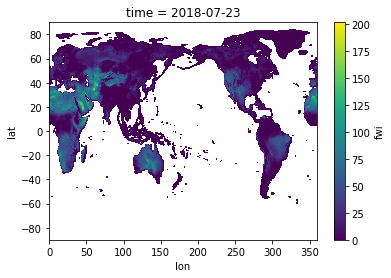

In [8]:
# Plot the first day
da_rt_en[0].plot();

The difference in lower resolution is not evident at this scale, but it will become evident when we explore the same dataset cropped over Attica (Greece).

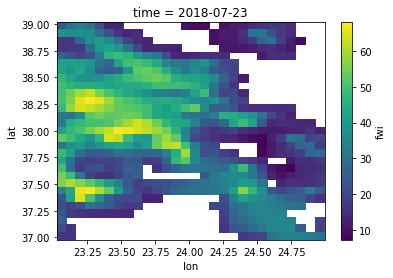

In [10]:
# Crop over area of interest, note lat = slice(top, bottom), lon = slice(left, right)!
# Use this service to get coordinates: https://boundingbox.klokantech.com/
# lon_min = 23, lon_max = 25, lat_min = 37, lat_max = 39
fwi_rt_hr = da_rt_hr.loc[dict(lat = slice(39, 37), lon = slice(23, 25))]
fwi_rt_hr[0].plot();

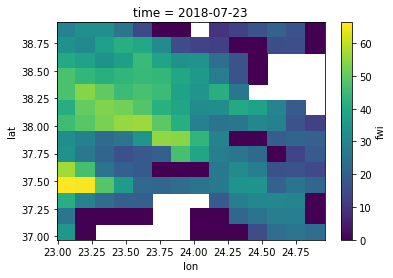

In [11]:
# Crop over area of interest, note lat = slice(top, bottom), lon = slice(left, right)!
# Use this service to get coordinates: https://boundingbox.klokantech.com/
# lon_min = 23, lon_max = 25, lat_min = 37, lat_max = 39
fwi_rt_en = da_rt_en.loc[dict(lat = slice(39, 37), lon = slice(23, 25))]
fwi_rt_en[0].plot();

### geff-re: ERA5 based reanalysis of the Fire Weather Index

This dataset provides historical records of global fire danger conditions from 1980 to the present day and it is made of two main types of products: (i) deterministic model outputs (HRES reanalysis), (ii) probabilistic model outputs (made of 10 ensemble members, ENS reanalysis). It is updated as soon as new ERA5 data becomes available (~2 months behind real-time). 

A single reanalysis layer is often used as proxy for observations (e.g. for validating the forecasts). Stacking together consecutive reanalysis estimates, allows to compute temporal trends and other long term statistics.

#### HRES reanalysis

Let's repeat the same operations shown above, this time the dataset has only 1 temporal layer.
The regular grid is smaller (640 x 1280) compared to the HRES/ENS forecasts.

The example below shows how to explore the single layer reanalysis. Examples of how to use a reanalysis datacube will be shown in follow-up tutorials.

In [12]:
# Open the dataset
ds_e5_hr = xr.open_dataset("./data/greece/global/ECMWF_EFFIS_20180723_1200_hr_e5/ECMWF_EFFIS_20180723_1200_hr/ECMWF_FWI_20180723_1200_hr.nc")
ds_e5_hr

<xarray.Dataset>
Dimensions:      (lat: 640, lon: 1280, time: 1)
Coordinates:
  * time         (time) datetime64[ns] 2018-07-23
  * lon          (lon) float32 0.0 0.28125 0.5625 0.84375 1.125 1.40625 ...
  * lat          (lat) float32 89.7849 89.5062 89.2259 88.9452 88.6644 ...
Data variables:
    fwi          (time, lat, lon) float32 ...
    ffmc         (time, lat, lon) float32 ...
    dmc          (time, lat, lon) float32 ...
    dc           (time, lat, lon) float32 ...
    isi          (time, lat, lon) float32 ...
    bui          (time, lat, lon) float32 ...
    dsr          (time, lat, lon) float32 ...
    danger_risk  (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.5 (http://mpimet.mp...
    Conventions:       CF-1.6
    Reference date:    20180723
    ECMWF fire model:  3.0
    Lincense:          Copernicus
    version:           3.0
    CDO:               Climate Data Operators version 1.9.5 (http://mpimet.mp...
    history: 

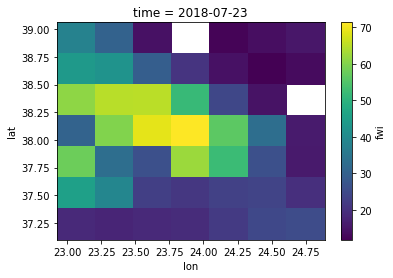

In [13]:
# Convert ds to a dataarray extracting only the variable fwi
da_e5_hr = ds_e5_hr.fwi
fwi_e5_hr = da_e5_hr.loc[dict(lat = slice(39, 37), lon = slice(23, 25))]
fwi_e5_hr[0].plot();

#### ENS reanalysis

Let us repeat the same operations shown above, one last time. The ENS reanalysis dataset of each ensemble member is similar to the HRES reanalysis but the with an even coarser regular grid (320 x 640).

In [14]:
# Open the dataset
ds_e5_en = xr.open_dataset("./data/greece/global/ECMWF_EFFIS_20180723_1200_en_e5/ECMWF_EFFIS_20180723_1200_en/ECMWF_FWI_20180723_1200_00.nc")
ds_e5_en

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 640, time: 1)
Coordinates:
  * time         (time) datetime64[ns] 2018-07-23
  * lon          (lon) float32 0.0 0.5625 1.125 1.6875 2.25 2.8125 3.375 ...
  * lat          (lat) float32 89.5701 89.0132 88.453 87.892 87.3308 86.7694 ...
Data variables:
    fwi          (time, lat, lon) float32 ...
    ffmc         (time, lat, lon) float32 ...
    dmc          (time, lat, lon) float32 ...
    dc           (time, lat, lon) float32 ...
    isi          (time, lat, lon) float32 ...
    bui          (time, lat, lon) float32 ...
    dsr          (time, lat, lon) float32 ...
    danger_risk  (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.5 (http://mpimet.mp...
    Conventions:       CF-1.6
    Reference date:    20180723
    ECMWF fire model:  3.0
    Lincense:          Copernicus
    version:           3.0
    CDO:               Climate Data Operators version 1.9.5 (http://mpimet.mp...
    his

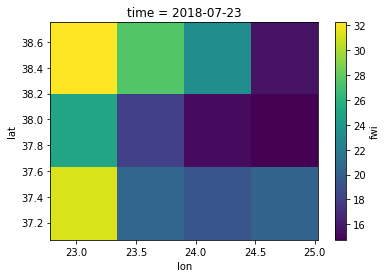

In [15]:
da_e5_en = ds_e5_en.fwi
fwi_e5_en = da_e5_en.loc[dict(lat = slice(39, 37), lon = slice(23, 25))]
fwi_e5_en[0].plot();

To get an idea of how different the 10 ensemble realisations are, we can look are the mean and spread (standard deviation) of the ensemble.

In [21]:
# Let's first find the files corresponding containing the FWI indices
dir = "./data/greece/global/ECMWF_EFFIS_20180723_1200_en_e5/ECMWF_EFFIS_20180723_1200_en/"
pattern = "ECMWF_FWI"
matching_files = [f for f in os.listdir(dir) if pattern in f]
matching_files

['ECMWF_FWI_20180723_1200_06.nc',
 'ECMWF_FWI_20180723_1200_03.nc',
 'ECMWF_FWI_20180723_1200_08.nc',
 'ECMWF_FWI_20180723_1200_04.nc',
 'ECMWF_FWI_20180723_1200_05.nc',
 'ECMWF_FWI_20180723_1200_00.nc',
 'ECMWF_FWI_20180723_1200_01.nc',
 'ECMWF_FWI_20180723_1200_02.nc',
 'ECMWF_FWI_20180723_1200_09.nc',
 'ECMWF_FWI_20180723_1200_07.nc']

Note that for the purpose of calculating mean and spread, the order in which files are listed in not important!

In [28]:
# Now we extract fwi from each file, crop over Attica and concatenate the layers in a datacube

# Initialise empty list
fwi = []
for filename in matching_files:
    full_path = os.path.join(dir, filename)
    # Open the dataset
    ds = xr.open_dataset(full_path)
    # Convert to dataarray by extractinf fwi
    da = ds.fwi
    # Crop over Attica
    layer = da.loc[dict(lat = slice(39, 37), lon = slice(23, 25))]
    # Append
    fwi.append(layer)
    
combined = xr.concat(fwi, dim = 'time')
combined

<xarray.DataArray 'fwi' (time: 10, lat: 3, lon: 4)>
array([[[ 32.226238,  30.856443,  27.044855,  17.050581],
        [ 26.212416,  20.507957,  17.771959,  15.778754],
        [ 29.346165,  21.778257,  22.118362,  23.07752 ]],

       [[ 30.796589,  27.270647,  22.002693,  14.722291],
        [ 25.160019,  19.930038,  17.197914,  15.028749],
        [ 30.899532,  21.402328,  20.882746,  21.569597]],

       [[ 31.056591,  28.60585 ,  24.118923,  16.440517],
        [ 24.995966,  17.775841,  16.201256,  13.162543],
        [ 29.273064,  18.935133,  19.620148,  19.981894]],

       [[ 35.233898,  32.539154,  26.012497,  17.063728],
        [ 26.072706,  19.440876,  16.1348  ,  15.99126 ],
        [ 29.851995,  19.529465,  19.580582,  21.41345 ]],

       [[ 31.745092,  28.912397,  24.311544,  17.068493],
        [ 23.246479,  18.373671,  17.433662,  15.528998],
        [ 27.256971,  18.203241,  20.181372,  22.863895]],

       [[ 32.25161 ,  27.503012,  23.357252,  15.581   ],
        [ 

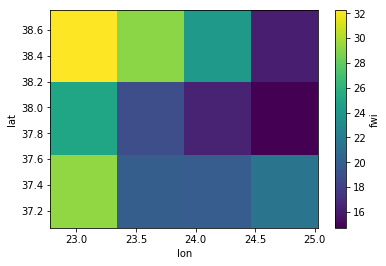

In [36]:
# Calculate mean, then plot
mean_fwi = combined.mean(dim = "time")
mean_fwi.plot()

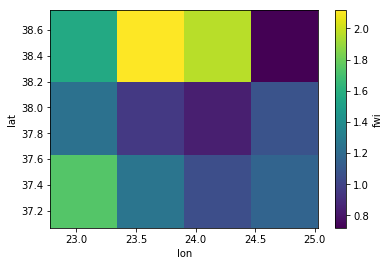

In [38]:
# Calculate spread (standard deviation), then plot
std_fwi = combined.std(dim = "time")
std_fwi.plot()

In the next tutorials we will skip over the operations above, as sample data is provided already cropped to the region of interest. Also ensemble mean and spread can be requested directly from the data provider. 